# Лабораторная работа №3. Классификация данных.
## Выполнил Коршиков Владислав Игоревич, группа 6133-010402D

In [26]:
# Подключаемся к Google Диск
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, train_test_split, cross_val_score

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report

import warnings
import sys  
if not sys.warnoptions:
    warnings.simplefilter("ignore")

Для данной лабораторной работы использовался DataFrame, содержащий все машины из Gran Turismo 6: https://www.kaggle.com/prasertk/gran-turismo-6-cars/version/1

Категориальные: car_type, drive

Числовые: price, hp, weight, torque

In [28]:
# Загрузим датафрейм и удалим строчки с пустующими значениями
gran_turismo_a = pd.read_csv("/content/drive/MyDrive/gran_turismo_gt6.csv") 
gran_turismo_2=gran_turismo_a
gran_turismo=gran_turismo_2.dropna(axis=0)
gran_turismo.isnull().sum()

brand       0
model       0
car_type    0
img_url     0
price       0
drive       0
hp          0
weight      0
torque      0
w_kg        0
dtype: int64

In [29]:
gran_turismo

,brand,model,car_type,img_url,price,drive,hp,weight,torque,w_kg
0,AC Cars,427 S/C '66,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,423200.0,FR,478.0,1311.0,651.0,272 to ? W/Kg
1,AEM,S2000,Tuned,https://www.kudosprime.com/gt6/images/cars/gt6...,100000.0,FR,430.0,1155.0,495.0,278 to 345 W/Kg
3,Abarth,500 '09,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,29500.0,FF,133.0,1035.0,180.0,96 to 251 W/Kg
4,Abarth,Grande Punto '09,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,27000.0,FF,153.0,1240.0,230.0,92 to ? W/Kg
5,Acura,CL 3.2 Type-S '01,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,32180.0,FF,260.0,1592.0,315.0,122 to ? W/Kg
...,...,...,...,...,...,...,...,...,...,...
1265,Volkswagen,Scirocco R '10,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,51500.0,FF,252.0,1410.0,330.0,133 to 298 W/Kg
1266,Volkswagen,W12 Nardo '01,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,1250000.0,MR,574.0,1300.0,620.0,329 to ? W/Kg
1267,Volvo,240 GLT Estate '88,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,15920.0,FR,127.0,1890.0,190.0,50 to ? W/Kg
1268,Volvo,C30 R-Design '09,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,42000.0,FF,227.0,1430.0,319.0,118 to ? W/Kg


In [30]:
#Уберём столбцы, которые не оказывают влияние на целевое значение, чтобы с датафреймом было проще работать
# Также, нам необходимо заменить tuned на street в car_type, так как tuned является подклассом race, но это выделение нигде не используется
gran_turismo.pop('w_kg')
gran_turismo.pop('model')
gran_turismo.pop('img_url')
gran_turismo['car_type'] = np.where((gran_turismo.car_type == 'Tuned'), 'Race', gran_turismo.car_type)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1. На любом датасете продемонстрировать многоклассовую классификацию с помощью ЛЮБОГО алгоритма. Оценить accuracy

In [31]:

#Разобьём датасет на тестовую и тренировочную датафреймы
gran_turismo_3 = gran_turismo.copy()
gran_turismo_3.pop('brand')


gran_turismo_3 = gran_turismo_3[gran_turismo_3.drive != 'RR']

gran_turismo_3['car_type'] = gran_turismo_3['car_type'].replace({"Street": 0, "Race": 1,})

# 1.1. На любом датасете продемонстрировать многоклассовую классификацию с помощью ЛЮБОГО алгоритма. Оценить accuracy.

In [32]:
y=  gran_turismo_3.drive
print(y)
X=gran_turismo_3.drop("drive", axis=1)
X.head()




0       FR
1       FR
3       FF
4       FF
5       FF
        ..
1265    FF
1266    MR
1267    FR
1268    FF
1269    FF
Name: drive, Length: 1013, dtype: object


,car_type,price,hp,weight,torque
0,0,423200.0,478.0,1311.0,651.0
1,1,100000.0,430.0,1155.0,495.0
3,0,29500.0,133.0,1035.0,180.0
4,0,27000.0,153.0,1240.0,230.0
5,0,32180.0,260.0,1592.0,315.0


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, stratify=y, random_state=12)






KNN_model = KNeighborsClassifier(n_neighbors=7)

KNN_model.fit(X_train, y_train)

KNN_prediction = KNN_model.predict(X_test)

print(accuracy_score(KNN_prediction, y_test))

0.5669291338582677


неплохо, учитывая, что тут 4 класса и нет настройки

# 1.2. А теперь сделаем то же самое, но с использованием кросс-валидации

In [34]:
parametrs = {
    "n_neighbors": np.array(range(1, 15, 1)),
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "p": [1, 2],
    "metric": ["minkowski", "euclidean", "manhattan", "chebyshev", "seuclidean", "mahalanobis"]
}


In [35]:
def random_search(model=None, refit="precision_macro", params=parametrs, X=X, y=y): 
    """
    Данная функция позволяет производить подбор гиперпараметров с помощью RandomSearch
    """
    random_search_cv = RandomizedSearchCV(
        model, 
        params, 
        scoring=["f1_macro", "precision_macro", "recall_macro"], 
        n_jobs=-1, 
        cv=StratifiedKFold(n_splits=5, random_state=7, shuffle=True), 
        verbose=3, 
        refit=refit
    )
    random_search = random_search_cv.fit(X, y)
    print(f"Best params for {refit}")
    print(random_search.best_params_)

In [36]:
def print_result(y_test=y_test, pred=None):
    print(f"Classification report: \n {classification_report(y_test, pred)}")
    print(f"Confusion matrix: \n {confusion_matrix(y_test, pred)} \n")
    sns.set(font_scale=0.8)
    sns.heatmap(confusion_matrix(y_test, pred), linewidths=.5, cmap="mako", annot=True)

In [37]:
random_search(model=KNN_model, refit="precision_macro", params=parametrs, X=X, y=y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best params for precision_macro
{'weights': 'distance', 'p': 1, 'n_neighbors': 10, 'metric': 'manhattan', 'algorithm': 'auto'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 553, in _fit
    **self.effective_metric_params_,
  File "sklearn/neighbors/_binary_tree.pxi", line 966, in

## Оптимальные значения{'weights': 'distance', 'p': 2, 'n_neighbors': 14, 'metric': 'chebyshev', 'algorithm': 'kd_tree'}

In [38]:
KNeighborsRandom = KNeighborsClassifier(
    weights="distance", 
    p=2, 
    n_neighbors=14, 
    metric="chebyshev", 
    algorithm="kd_tree"
)

KNeighborsRandom.fit(X_train, y_train)
KNeighborsRandomPredict = KNeighborsRandom.predict(X_test)
score = accuracy_score(KNeighborsRandomPredict, y_test)
print(f"Average precision score with hyperparameter setting (RandomSearchcv): {np.mean(score) * 100:.2f}%")

Average precision score with hyperparameter setting (RandomSearchcv): 62.20%


## Как видно, кросс-валидация методом Random Search привела к существенному повышению точности

# 1.3. Поиграться с гиперпараметром, связанным со сложностью модели (в случае kNN — k_neighbours) и построить график accuracy для train set и test_set для разных значений гиперпараметра 

In [39]:
neighbors = [3, 6, 7, 8, 9, 10, 11, 12]
accuracy_list = []

for neighbor in neighbors:
  KNeighborsRandom = KNeighborsClassifier(
      weights="distance", 
      p=2, 
      n_neighbors=neighbor, 
      metric="chebyshev", 
      algorithm="kd_tree"
  )

  KNeighborsRandom.fit(X_train, y_train)
  KNeighborsRandomPredict = KNeighborsRandom.predict(X_test)
  accuracy_l = accuracy_score(KNeighborsRandomPredict, y_test)
  accuracy_list.append(accuracy_l)

print(accuracy_list)

accuracy_dict = dict(zip(neighbors, accuracy_list))

print(accuracy_dict)

[0.6141732283464567, 0.6141732283464567, 0.6377952755905512, 0.6338582677165354, 0.6338582677165354, 0.6259842519685039, 0.6220472440944882, 0.6220472440944882]
{3: 0.6141732283464567, 6: 0.6141732283464567, 7: 0.6377952755905512, 8: 0.6338582677165354, 9: 0.6338582677165354, 10: 0.6259842519685039, 11: 0.6220472440944882, 12: 0.6220472440944882}


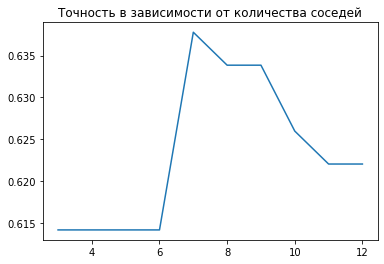

In [40]:
plt.plot(neighbors, accuracy_list)
plt.title('Точность в зависимости от количества соседей')
plt.show()

## Как видно из графика, точность обучения зависит от количества соседей, но всё равно уступает оптимальному значению

# 1.4. Построить confusion matrix (это вроде матрицы TN / TP/ FN/ FP, только расширенной для многоклассовой классификации, чтобы понять в какие стороны чаще ошибается классификатор).

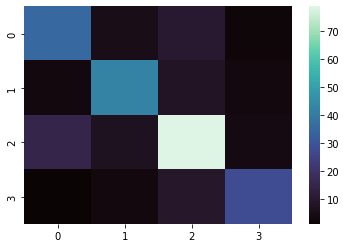

In [41]:
# Построим confusion matrix
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
DTCPredict = DTC.predict(X_test)
sns.heatmap(confusion_matrix(y_test, DTCPredict), cmap="mako")

# **2. Бинарная классификация.**

На любом (но уже другом, бинарном) датасете продемонстрировать бинарную классификацию (можно использовать любой алгоритм), посчитать метрики: accuracy, precision, recall, f-measure, а также составить classification_report

In [42]:
#Поменяем целевое значение на бинарное car_type
gran_turismo_5 = gran_turismo_a.copy()

In [43]:
gran_turismo_5

,brand,model,car_type,img_url,price,drive,hp,weight,torque,w_kg
0,AC Cars,427 S/C '66,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,423200.0,FR,478.0,1311.0,651.0,272 to ? W/Kg
1,AEM,S2000,Tuned,https://www.kudosprime.com/gt6/images/cars/gt6...,100000.0,FR,430.0,1155.0,495.0,278 to 345 W/Kg
2,Abarth,1500 Biposto Bertone B.A.T 1 '52,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,3500000.0,FR,72.0,870.0,NaN,62 to 250 W/Kg
3,Abarth,500 '09,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,29500.0,FF,133.0,1035.0,180.0,96 to 251 W/Kg
4,Abarth,Grande Punto '09,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,27000.0,FF,153.0,1240.0,230.0,92 to ? W/Kg
...,...,...,...,...,...,...,...,...,...,...
1265,Volkswagen,Scirocco R '10,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,51500.0,FF,252.0,1410.0,330.0,133 to 298 W/Kg
1266,Volkswagen,W12 Nardo '01,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,1250000.0,MR,574.0,1300.0,620.0,329 to ? W/Kg
1267,Volvo,240 GLT Estate '88,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,15920.0,FR,127.0,1890.0,190.0,50 to ? W/Kg
1268,Volvo,C30 R-Design '09,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,42000.0,FF,227.0,1430.0,319.0,118 to ? W/Kg


In [44]:
gran_turismo_5.pop('w_kg')
gran_turismo_5.pop('model')
gran_turismo_5.pop('img_url')
gran_turismo_5.pop('brand')
gran_turismo_5.pop('drive')
gran_turismo_5['car_type'] = np.where((gran_turismo_5.car_type == 'Tuned'), 'Race', gran_turismo_5.car_type)
gran_turismo_5['car_type'] = gran_turismo_5['car_type'].replace({"Street": 0, "Race": 1,})

In [45]:
gran_turismo_6=gran_turismo_5.dropna(axis=0)

In [46]:
y=  gran_turismo_6.car_type
print(y)
X=gran_turismo_6.drop("car_type", axis=1)
X.head()

0       0
1       1
3       0
4       0
5       0
       ..
1265    0
1266    0
1267    0
1268    0
1269    0
Name: car_type, Length: 1031, dtype: int64


,price,hp,weight,torque
0,423200.0,478.0,1311.0,651.0
1,100000.0,430.0,1155.0,495.0
3,29500.0,133.0,1035.0,180.0
4,27000.0,153.0,1240.0,230.0
5,32180.0,260.0,1592.0,315.0


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, stratify=y, random_state=12)



In [48]:
KNeighborsRandom = KNeighborsClassifier(
    weights="distance", 
    p=2, 
    n_neighbors=14, 
    metric="chebyshev", 
    algorithm="kd_tree"
)

KNeighborsRandom.fit(X_train, y_train)
KNeighborsRandomPredict = KNeighborsRandom.predict(X_test)
score = accuracy_score(KNeighborsRandomPredict, y_test)
print(f"Average precision score with hyperparameter setting (RandomSearchcv): {np.mean(score) * 100:.2f}%")

Average precision score with hyperparameter setting (RandomSearchcv): 91.86%


In [49]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
DTCPredict = DTC.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, DTCPredict)}")
print(f"Precision: {precision_score(y_test, DTCPredict)}")
print(f"Recall: {recall_score(y_test, DTCPredict)}")
print(f"F1-score: {f1_score(y_test, DTCPredict)}")
print(f"Classification report:\n{classification_report(y_test, DTCPredict)}")

Accuracy: 0.9031007751937985
Precision: 0.7592592592592593
Recall: 0.7735849056603774
F1-score: 0.7663551401869159
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       205
           1       0.76      0.77      0.77        53

    accuracy                           0.90       258
   macro avg       0.85      0.86      0.85       258
weighted avg       0.90      0.90      0.90       258



## С бинарной классификацией KNN справляется хорошо

# 3. Использование нормализации признаков

In [50]:
# Опробуем на примере из задания 1.1

y=  gran_turismo_3.drive
print(y)
X=gran_turismo_3.drop("drive", axis=1)
X.head()


Scaler = MinMaxScaler()
X_scal = Scaler.fit_transform(X)



# Сначала выведем результат без нормализации

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, stratify=y, random_state=12)


KNN_model = KNeighborsClassifier(n_neighbors=7)

KNN_model.fit(X_train, y_train)

KNN_prediction = KNN_model.predict(X_test)

print(f'Без нормализации: {accuracy_score(KNN_prediction, y_test)} ')

#Теперь с нормализацией:

X_train, X_test, y_train, y_test = train_test_split(X_scal, y, test_size=.25, stratify=y, random_state=12)


KNN_model = KNeighborsClassifier(n_neighbors=7)

KNN_model.fit(X_train, y_train)

KNN_prediction = KNN_model.predict(X_test)

print(f'C нормализацией:: {accuracy_score(KNN_prediction, y_test)} ')



0       FR
1       FR
3       FF
4       FF
5       FF
        ..
1265    FF
1266    MR
1267    FR
1268    FF
1269    FF
Name: drive, Length: 1013, dtype: object
Без нормализации: 0.5669291338582677 
C нормализацией:: 0.6062992125984252 


##Точность прогноза объективно возросла!